 ### Option 1: Load CIFAR 10 (Locally) using load_cifar_10.py file

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('X_train Shape: ', x_train.shape)
print('X_test Shape: ', x_test.shape)

print('Y_train Shape: ', y_train.shape)
print('Y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
X_test Shape:  (10000, 32, 32, 3)
Y_train Shape:  (50000, 1)
Y_test Shape:  (10000, 1)


In [ ]:
ascolumns = x_train.reshape(50000,-1)
ascolumns2=x_test.reshape(10000,-1)

In [ ]:
print(ascolumns.shape)
print(ascolumns2.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
#Scaling X_train and X_test between 0 and 1
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
t = scaler.fit_transform(ascolumns)
t1= scaler.transform(ascolumns2)
X_train = t.reshape(x_train.shape)
X_test=t1.reshape(x_test.shape)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
y_train=y_train.reshape(50000)
y_test=y_test.reshape(10000)

In [ ]:
 y_train.max()+1

10

In [ ]:
bb1 = np.zeros((y_train.size, y_train.max()+1))
bb2= np.zeros((y_test.size,y_test.max()+1))

In [ ]:
bb1[np.arange(y_train.size),y_train] = 1
bb2[np.arange(y_test.size),y_test] = 1

In [ ]:
Y_train=bb1
Y_test=bb2

In [ ]:
#one hot encoding of y variable
Y_train
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
X_train= X_train.reshape(50000,-1)
X_test= X_test.reshape(10000,-1)

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
#hyperparameters
learning_rate=0.1
w1= np.random.randn(3072,500)
b1=np.random.randn(1,500)
w2=np.random.randn(500,10)
b2=np.random.randn(1,10)
train_costfnc=[]
test_costfnc=[]
train_accuracytrack=[]
test_accuracytrack=[]
epochs=1200

In [ ]:
#Function to implement sigmoid
def sigmoid(z):
    sig=1/(1+np.exp(-z))
    #sig=np.minimum(sig,0.999999)
    #sig=np.maximum(sig,0.000001)
    return sig

In [ ]:
#Function to implement softmax
def softmax(x):
    n1=np.max(x)
    p1=x-n1
    e_x = np.exp(p1)
    o1=np.sum(e_x,axis=1)
    r1=e_x.T/o1
    #r1=np.minimum(r1,0.99999)
    #r1=np.maximum(r1,0.00001)
    return r1.T

In [ ]:
for h in range (epochs):
    z1=np.dot(X_train,w1)+b1
    a1=sigmoid(z1)
    #a1=np.array(a1).reshape(50000,10)
    z2=np.dot(a1,w2)+b2
    a2=softmax(z2)
    yhat=np.log(a2)
    y_pred=np.argmax(a2,axis=1)
    train_accuracytrack.append(np.mean(y_pred==np.argmax(Y_train,axis=1)))
    cost=-np.sum(np.multiply(yhat,Y_train))/50000
    train_costfnc.append(np.squeeze(cost))
    #TestData
    t_z1=np.dot(X_test,w1)+b1
    t_a1=sigmoid(t_z1)
    #t_a1=np.array(t_a1).reshape(10000,10)
    t_z2=np.dot(t_a1,w2)+b2
    t_a2=softmax(t_z2)
    t_yhat=np.log(t_a2)
    t_y_pred=np.argmax(t_a2,axis=1)
    test_accuracytrack.append(np.mean(t_y_pred==y_test))
    t_cost=-np.sum(np.multiply(t_yhat,Y_test))/10000
    test_costfnc.append(np.squeeze(t_cost))
    #weight updation
    u1=(a2-Y_train)
    u2=(1-a1)
    dw2=np.dot(a1.T,u1)/50000
    db2=(np.sum(u1,axis=0))/50000
    c1=np.multiply(a1,u2)
    c2=np.dot((a2-Y_train),w2.T)
    c3=np.multiply(c1,c2)
    dw1=np.dot(X_train.T,c3)/50000
    db1=(np.sum(c3,axis=0))/50000
    print("Printing epochs")
    print(h)
    w1=w1-learning_rate*dw1
    w2=w2-learning_rate*dw2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2

Printing epochs
0
Printing epochs
1
Printing epochs
2
Printing epochs
3
Printing epochs
4
Printing epochs
5
Printing epochs
6
Printing epochs
7
Printing epochs
8
Printing epochs
9
Printing epochs
10
Printing epochs
11
Printing epochs
12
Printing epochs
13
Printing epochs
14
Printing epochs
15
Printing epochs
16
Printing epochs
17
Printing epochs
18
Printing epochs
19
Printing epochs
20
Printing epochs
21
Printing epochs
22
Printing epochs
23
Printing epochs
24
Printing epochs
25
Printing epochs
26
Printing epochs
27
Printing epochs
28
Printing epochs
29
Printing epochs
30
Printing epochs
31
Printing epochs
32
Printing epochs
33
Printing epochs
34
Printing epochs
35
Printing epochs
36
Printing epochs
37
Printing epochs
38
Printing epochs
39
Printing epochs
40
Printing epochs
41
Printing epochs
42
Printing epochs
43
Printing epochs
44
Printing epochs
45
Printing epochs
46
Printing epochs
47
Printing epochs
48
Printing epochs
49
Printing epochs
50
Printing epochs
51
Printing epochs
52
Pri

In [ ]:
#Ploting Training and Testing Cost vs Number of Epochs
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(train_costfnc,label="Train Data")
ax.plot(test_costfnc,label="Testing Data")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cost")
ax.legend()

In [ ]:
#Ploting Training and Testing Accuracy vs Number of Epochs
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(train_accuracytrack,label="Train Data")
ax.plot(test_accuracytrack,label="Testing Data")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

In [ ]:
#Printing confusion Matrix for test data
t_z1=np.dot(X_test,w1)+b1
t_a1=sigmoid(t_z1)
#t_a1=np.array(t_a1).reshape(10000,10)
t_z2=np.dot(t_a1,w2)+b2
t_a2=softmax(t_z2)
t_y_pred=np.argmax(t_a2,axis=1)
print("Confusion Matrix \n")
print(confusion_matrix(y_test,t_y_pred))
print(accuracy_score(y_test,t_y_pred))

In [4]:
#part 2
x_train=x_train/255
x_test=x_test/255

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose

In [6]:
#function for printing images
def show_pics(X):
  plt.figure(figsize=(15,5))
  for i in range(10):
    ax=plt.subplot(1,10,i+1)
    ax.imshow((X[i]))

In [7]:
#encoding
input_layer = Input(shape=(32,32,3))
x=Conv2D(16,(3,3),activation="relu",padding="same")(input_layer)
x=MaxPooling2D((2,2))(x)
x=Conv2D(3,(3,3),activation="relu",padding="same")(x)
x=MaxPooling2D((2,2),name="CodeLayer")(x)
#Decoding
x=Conv2DTranspose(3,(3,3),activation="relu",padding="same")(x)
x=UpSampling2D((2,2))(x)
x=Conv2DTranspose(16,(3,3),activation="relu",padding="same")(x)
x=UpSampling2D((2,2))(x)
output_layer=Conv2D(3,(3,3),activation="relu",padding="same")(x)

In [8]:
cifar_model=Model(input_layer,output_layer)
cifar_model.compile(optimizer="SGD", loss="mse")
cifar_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 3)         435       
_________________________________________________________________
CodeLayer (MaxPooling2D)     (None, 8, 8, 3)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 3)           84        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 3)        

In [9]:
cifar_model.fit(x_train,x_train,epochs=10)

Epoch 1/3
1563/1563 [==============================] - 114s 73ms/step - loss: 0.0554
Epoch 2/3
1563/1563 [==============================] - 106s 68ms/step - loss: 0.0233
Epoch 3/3
1563/1563 [==============================] - 102s 65ms/step - loss: 0.0201


In [10]:
#getting output from encoder
get_encoded = Model(inputs=cifar_model.input, outputs=cifar_model.get_layer("CodeLayer").output)
coded_pic=get_encoded.predict(x_train)

In [11]:
#output from decoder
decoded_pics=cifar_model.predict(x_train)

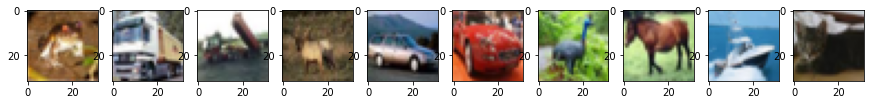

In [12]:
show_pics(x_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

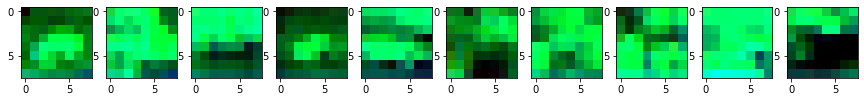

In [13]:
show_pics(coded_pic)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


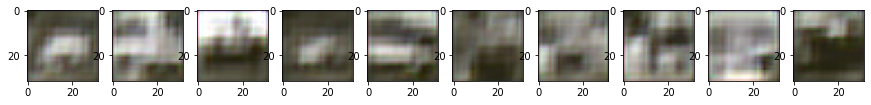

In [14]:
show_pics(decoded_pics)

In [15]:
#encoded test data
test_coded_pic=get_encoded.predict(x_test)

In [44]:
#clustering the outputs from encoder
from sklearn.cluster import KMeans
coded_pic = coded_pic.reshape(50000,-1)
kmeans = KMeans(n_clusters=10,max_iter=300)
img_label=kmeans.fit_predict(coded_pic)

In [45]:
print(img_label)

[2 5 9 ... 9 1 3]


In [46]:
#confusion matrix between cluster ids and y_train
cf=confusion_matrix(y_train,img_label)
print(cf)

[[ 290  678  141  950  325  475  987  475  226  453]
 [ 210  501  456  334  789  831  269  497  428  685]
 [ 247  148  579  688  763  258  347 1036  707  227]
 [ 592  120  842  532  537  431  261  748  670  267]
 [ 421  164 1092  325  816  222  110  881  725  244]
 [ 703  102  872  502  495  808  164  699  493  162]
 [ 233   37  790  393  887  279  187  837 1238  119]
 [ 489  245  633  553  587  476  127  860  298  732]
 [ 268 1345  214  454  316  855  235  324  140  849]
 [  93  681  170  471  585  433  218  546  123 1680]]


In [47]:
from scipy.optimize import linear_sum_assignment
c_val=linear_sum_assignment(cf,maximize=True)[1]

In [48]:
c_val

array([6, 4, 7, 0, 2, 5, 8, 3, 1, 9])

In [49]:
for i in range (50000):
  if (img_label[i]==0):
    img_label[i]=c_val[0]
  elif (img_label[i]==1):
    img_label[i]=c_val[1]
  elif (img_label[i]==2):
    img_label[i]=c_val[2]
  elif (img_label[i]==3):
    img_label[i]=c_val[3]
  elif (img_label[i]==4):
    img_label[i]=c_val[4]
  elif (img_label[i]==5):
    img_label[i]=c_val[5]
  elif (img_label[i]==6):
    img_label[i]=c_val[6]
  elif (img_label[i]==7):
    img_label[i]=c_val[7]
  elif (img_label[i]==8):
    img_label[i]=c_val[8]
  elif (img_label[i]==9):
    img_label[i]=c_val[9]

In [50]:
img_label

array([7, 5, 9, ..., 9, 4, 0], dtype=int32)

In [51]:
print(accuracy_score(y_train,img_label))

0.13284


In [52]:
#mapping with most probabale values of cluster ids
max_val=np.argmax(cf,axis=0)
print("Max value of cluster id's",max_val)

Max value of cluster id's [5 8 4 0 6 8 0 2 6 9]


In [53]:
print(img_label)

[7 5 9 ... 9 4 0]


In [54]:
img_label=kmeans.predict(coded_pic)

In [55]:
img_label

array([2, 5, 9, ..., 9, 1, 3], dtype=int32)

In [56]:
for i in range (50000):
  if (img_label[i]==0):
    img_label[i]=max_val[0]
  elif (img_label[i]==1):
    img_label[i]=max_val[1]
  elif (img_label[i]==2):
    img_label[i]=max_val[2]
  elif (img_label[i]==3):
    img_label[i]=max_val[3]
  elif (img_label[i]==4):
    img_label[i]=max_val[4]
  elif (img_label[i]==5):
    img_label[i]=max_val[5]
  elif (img_label[i]==6):
    img_label[i]=max_val[6]
  elif (img_label[i]==7):
    img_label[i]=max_val[7]
  elif (img_label[i]==8):
    img_label[i]=max_val[8]
  elif (img_label[i]==9):
    img_label[i]=max_val[9]

In [57]:
print(img_label)

[4 8 9 ... 9 8 0]


In [58]:
print(accuracy_score(y_train,img_label))

0.21546


In [59]:
#predicting test data
test_labels=kmeans.predict(test_coded_pic.reshape(10000,-1))

In [60]:
cf1=confusion_matrix(y_test,test_labels)
print(cf1)

[[ 47 125  27 222  56 116 220  85  33  69]
 [ 33 100  73  73 144 172  56 116 104 129]
 [ 54  31 109 140 160  51  76 209 135  35]
 [120  22 160  93 129  97  58 154 113  54]
 [ 72  17 211  69 163  47  17 186 162  56]
 [155  26 161 104  87 167  45 133  82  40]
 [ 39   9 155  72 174  61  45 178 241  26]
 [104  61 114 110 105  89  29 166  55 167]
 [ 64 292  42  65  46 182  34  72  24 179]
 [ 17 139  31 106 122  88  50 110  20 317]]


In [61]:
#mapping with most probabale values of cluster ids
test_max_val=np.argmax(cf1,axis=0)
print (test_max_val)

[5 8 4 0 6 8 0 2 6 9]


In [62]:
for i in range (10000):
  if (test_labels[i]==0):
    test_labels[i]=test_max_val[0]
  elif (test_labels[i]==1):
    test_labels[i]=test_max_val[1]
  elif (test_labels[i]==2):
    test_labels[i]=test_max_val[2]
  elif (test_labels[i]==3):
    test_labels[i]=test_max_val[3]
  elif (test_labels[i]==4):
    test_labels[i]=test_max_val[4]
  elif (test_labels[i]==5):
    test_labels[i]=test_max_val[5]
  elif (test_labels[i]==6):
    test_labels[i]=test_max_val[6]
  elif (test_labels[i]==7):
    test_labels[i]=test_max_val[7]
  elif (test_labels[i]==8):
    test_labels[i]=test_max_val[8]
  elif (test_labels[i]==9):
    test_labels[i]=test_max_val[9]

In [63]:
print('The accuracy of test data is ',accuracy_score(y_test,test_labels))
print('\n The confusion matrix is\n',confusion_matrix(y_test,test_labels))

The accuracy of test data is  0.2223

 The confusion matrix is
 [[442   0  85   0  27  47  89   0 241  69]
 [129   0 116   0  73  33 248   0 272 129]
 [216   0 209   0 109  54 295   0  82  35]
 [151   0 154   0 160 120 242   0 119  54]
 [ 86   0 186   0 211  72 325   0  64  56]
 [149   0 133   0 161 155 169   0 193  40]
 [117   0 178   0 155  39 415   0  70  26]
 [139   0 166   0 114 104 160   0 150 167]
 [ 99   0  72   0  42  64  70   0 474 179]
 [156   0 110   0  31  17 142   0 227 317]]
